<a href="https://colab.research.google.com/github/DeaAnalytics/univ-workshop/blob/main/notebooks/R/C7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  **Análisis C7**

A la data:


*   Se empataron las coladas de temperatura con resto de variables
*   Se eliminaron de la columna de Mes, los datos numéricos (250 datos)



**Leer el archivo de github**

In [169]:
df <- read.csv("https://github.com/DeaAnalytics/univ-workshop/raw/main/data/Analisis_C7_temperatura.csv", fileEncoding = "latin1")
head(df)

,Mes,Turno,No_Colada,GPO_CH,TCM,No_Cargas,C_Arrabio,C_Primeras,C_Segundas,C_Triturado,⋯,MgO_ESCORIA,FeO_ESCORIA,CaO,SiO2,Al2O3,IB3,IB4,RESULTADO,coladas,TEMPERATURA
,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,Marzo,1,48214,5,174.11,Hibrida,0,8.529091,54.74126,35.09276,⋯,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,49.23,48214,853
2,Marzo,1,48215,5,162.45,1,0,9.048938,48.96891,34.27516,⋯,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,52.33,48215,671
3,Marzo,1,48216,5,164.56,1,0,8.629071,47.05882,36.09626,⋯,10.58,29.67,30.46,10.17,7.42,1.7317,2.33,37.65,48216,780
4,Marzo,1,48217,5,168.31,1,0,10.635138,46.01628,35.03060,⋯,9.24,32.88,27.99,10.71,6.53,1.6235,2.16,60.73,48217,849
5,Marzo,1,48218,5,168.32,1,0,0.000000,56.44011,34.93346,⋯,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,57.62,48218,889
6,Marzo,1,48219,5,169.18,1,0,0.000000,55.10699,37.12023,⋯,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,54.12,48219,833


**Hago un summary, para dar un vistazo de como está mi data:**

In [170]:
summary(df)

     Mes                Turno         No_Colada        GPO_CH         
 Length:2364        Min.   :1.000   Min.   :48214   Length:2364       
 Class :character   1st Qu.:1.000   1st Qu.:48806   Class :character  
 Mode  :character   Median :1.000   Median :49398   Mode  :character  
                    Mean   :1.481   Mean   :49397                     
                    3rd Qu.:2.000   3rd Qu.:49989                     
                    Max.   :2.000   Max.   :50580                     
                                                                      
      TCM          No_Cargas           C_Arrabio       C_Primeras   
 Min.   : 91.65   Length:2364        Min.   : 0.00   Min.   : 0.00  
 1st Qu.:160.91   Class :character   1st Qu.: 0.00   1st Qu.:26.41  
 Median :166.30   Mode  :character   Median : 0.00   Median :37.76  
 Mean   :165.53                      Mean   : 1.79   Mean   :40.40  
 3rd Qu.:170.92                      3rd Qu.: 0.00   3rd Qu.:61.70  
 Max.   :213.25   

Del summary anterior, puedo ver que tengo NA's en la variable de TEMPERATURA, los voy a quitar

In [171]:
df <- df[!is.na(df$TEMPERATURA),]
summary(df)

     Mes                Turno        No_Colada        GPO_CH         
 Length:2339        Min.   :1.00   Min.   :48214   Length:2339       
 Class :character   1st Qu.:1.00   1st Qu.:48800   Class :character  
 Mode  :character   Median :1.00   Median :49410   Mode  :character  
                    Mean   :1.48   Mean   :49403                     
                    3rd Qu.:2.00   3rd Qu.:49996                     
                    Max.   :2.00   Max.   :50580                     
                                                                     
      TCM          No_Cargas           C_Arrabio        C_Primeras   
 Min.   : 91.65   Length:2339        Min.   : 0.000   Min.   : 0.00  
 1st Qu.:160.93   Class :character   1st Qu.: 0.000   1st Qu.:25.98  
 Median :166.31   Mode  :character   Median : 0.000   Median :37.49  
 Mean   :165.54                      Mean   : 1.756   Mean   :40.13  
 3rd Qu.:170.93                      3rd Qu.: 0.000   3rd Qu.:61.27  
 Max.   :213.25     

**Le damos un vistazo a la estructura:**

In [172]:
str(df)

'data.frame':	2339 obs. of  50 variables:
 $ Mes                 : chr  "Marzo" "Marzo" "Marzo" "Marzo" ...
 $ Turno               : int  1 1 1 1 1 1 1 1 1 1 ...
 $ No_Colada           : int  48214 48215 48216 48217 48218 48219 48220 48221 48222 48223 ...
 $ GPO_CH              : chr  "5" "5" "5" "5" ...
 $ TCM                 : num  174 162 165 168 168 ...
 $ No_Cargas           : chr  "Hibrida" "1" "1" "1" ...
 $ C_Arrabio           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ C_Primeras          : num  8.53 9.05 8.63 10.64 0 ...
 $ C_Segundas          : num  54.7 49 47.1 46 56.4 ...
 $ C_Triturado         : num  35.1 34.3 36.1 35 34.9 ...
 $ C_Retornos          : num  1.64 7.71 8.22 8.32 8.63 ...
 $ Cumpl_CM            : num  62.3 75.4 75.9 74.7 96.1 ...
 $ Cons_Chorreadura    : num  7.323 0.831 7.863 7.694 7.545 ...
 $ Cons_Ri             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Rendimiento_Teo     : num  87.6 89.1 88.4 88.5 87.9 ...
 $ Altura_Banda        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Tiempo_Ca

# **Hacemos algunos análisis a la variable Temperatura, que es la de nuestro interés**

En las siguiente líneas observaremos como podemos obtener las visualizaciones de:


1.   Gráfico de Densidad
2.   Histograma
3.   Boxplot



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  236.0   619.0   708.0   729.8   805.5  1289.0 

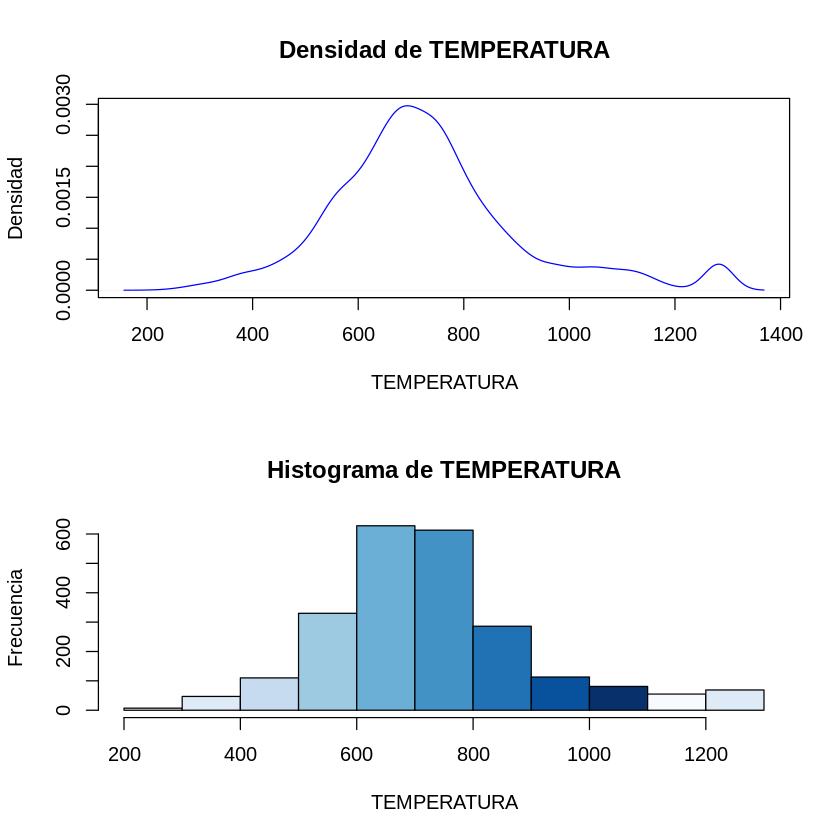

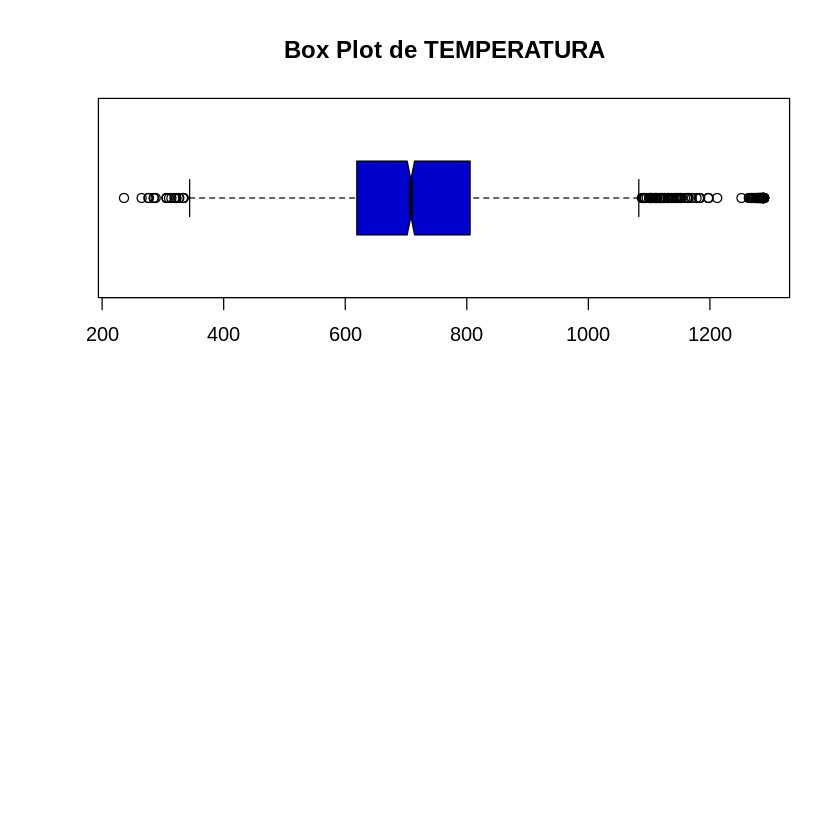

In [173]:
summary(df$TEMPERATURA)
par(mfrow = c(2,1))
plot(density(df$TEMPERATURA), main = "Densidad de TEMPERATURA", xlab = "TEMPERATURA", 
     ylab = "Densidad", col="blue")
hist(x = df$TEMPERATURA, main = "Histograma de TEMPERATURA", xlab = "TEMPERATURA", 
     ylab = "Frecuencia", col=blues9)
boxplot(df$TEMPERATURA, main = "Box Plot de TEMPERATURA", col = c("#0000CC"), notch = T, horizontal = TRUE)
par(mfrow = c(1,1))

**Cambié los datos del Mes a inglés, para su manipulación correcta:**

In [174]:
df$Mes <- replace(df$Mes, df$Mes == "Marzo", "March")
df$Mes <- replace(df$Mes, df$Mes == "Abril", "April")
df$Mes <- replace(df$Mes, df$Mes == "Mayo", "May")
df$Mes <- replace(df$Mes, df$Mes == "Junio", "June")
head(df)

,Mes,Turno,No_Colada,GPO_CH,TCM,No_Cargas,C_Arrabio,C_Primeras,C_Segundas,C_Triturado,⋯,MgO_ESCORIA,FeO_ESCORIA,CaO,SiO2,Al2O3,IB3,IB4,RESULTADO,coladas,TEMPERATURA
,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,March,1,48214,5,174.11,Hibrida,0,8.529091,54.74126,35.09276,⋯,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,49.23,48214,853
2,March,1,48215,5,162.45,1,0,9.048938,48.96891,34.27516,⋯,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,52.33,48215,671
3,March,1,48216,5,164.56,1,0,8.629071,47.05882,36.09626,⋯,10.58,29.67,30.46,10.17,7.42,1.7317,2.33,37.65,48216,780
4,March,1,48217,5,168.31,1,0,10.635138,46.01628,35.03060,⋯,9.24,32.88,27.99,10.71,6.53,1.6235,2.16,60.73,48217,849
5,March,1,48218,5,168.32,1,0,0.000000,56.44011,34.93346,⋯,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,57.62,48218,889
6,March,1,48219,5,169.18,1,0,0.000000,55.10699,37.12023,⋯,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,Sin Análisis,54.12,48219,833


Me aseguro que si se haya efectuado el cambio:

In [175]:
df$Mes <- factor(df$Mes, levels = month.name)
summary(df$Mes)

January  February     March     April       May      June      July    August 
        0         0       674       697       742       226         0         0 
September   October  November  December 
        0         0         0         0

**Hago un plot del Comportamiento de la Temperatura por mes:**

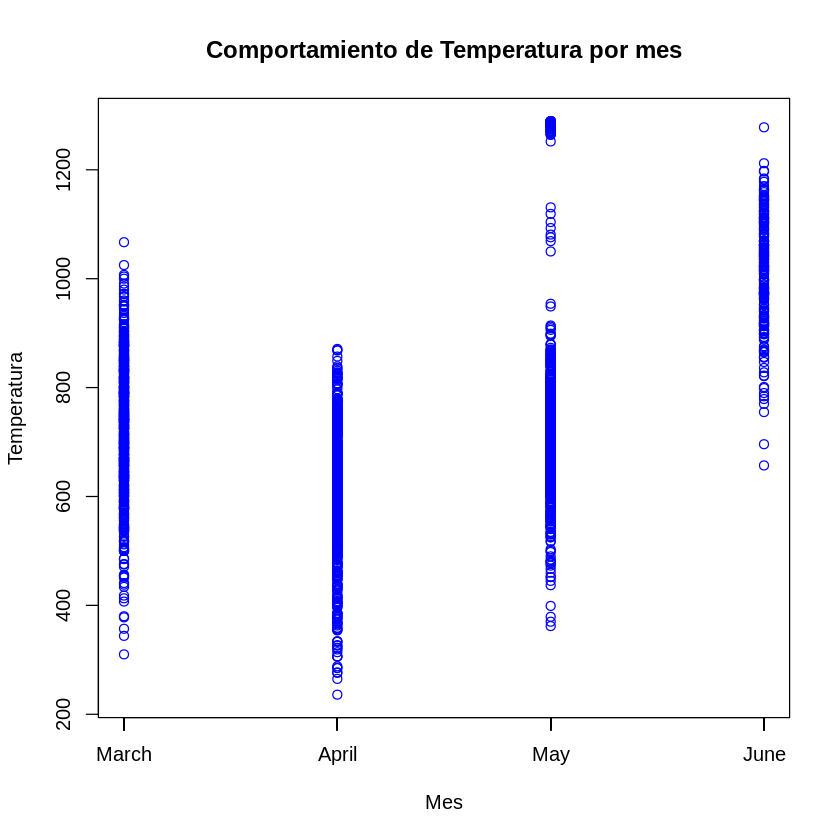

In [176]:
plot(x=as.numeric(df$Mes), y=df$TEMPERATURA, xaxt = "n", xlab = "Mes", ylab = "Temperatura", main = "Comportamiento de Temperatura por mes" , col = c("blue"))
axis(side = 1, at = as.numeric(df$Mes), labels = df$Mes)

**Hago un boxplot por mes para el comportamiento de la Temperatura:**

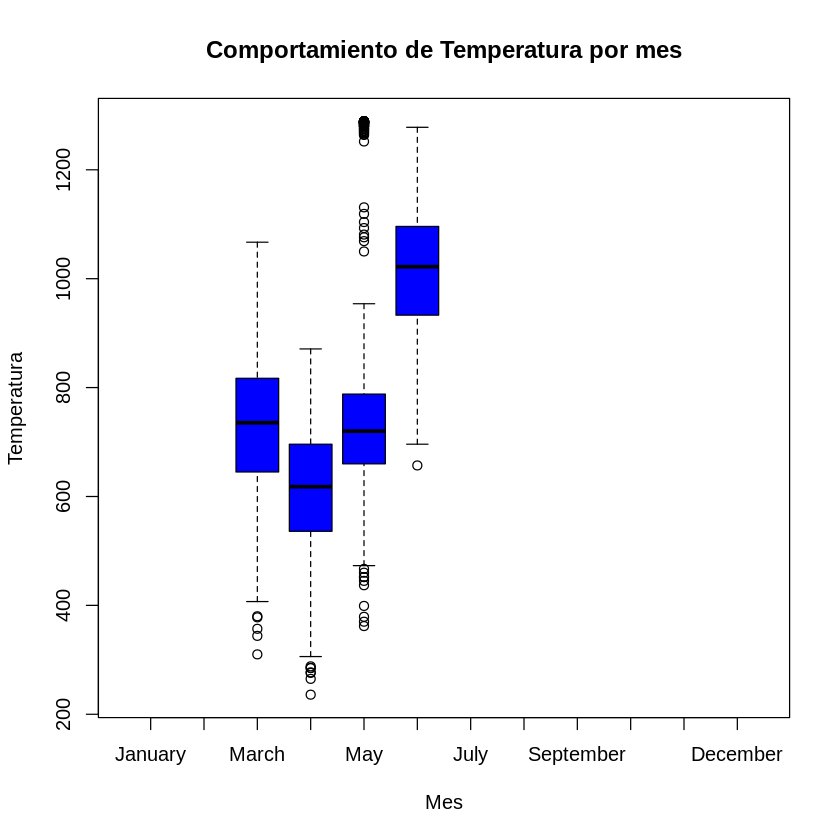

In [177]:
plot(x = df$Mes, y = df$TEMPERATURA, xlab = "Mes", ylab = "Temperatura", main = "Comportamiento de Temperatura por mes" , col = c("blue"))

**Analizo como se distribuyen los Grupos de Chatarra, para saber cual es el que más se produce:**

In [151]:
table(df$GPO_CH)


1 ARRABIO        1A        1B         2        3A        3B         4         5 
       32       544        16       107       248       754       129       509 

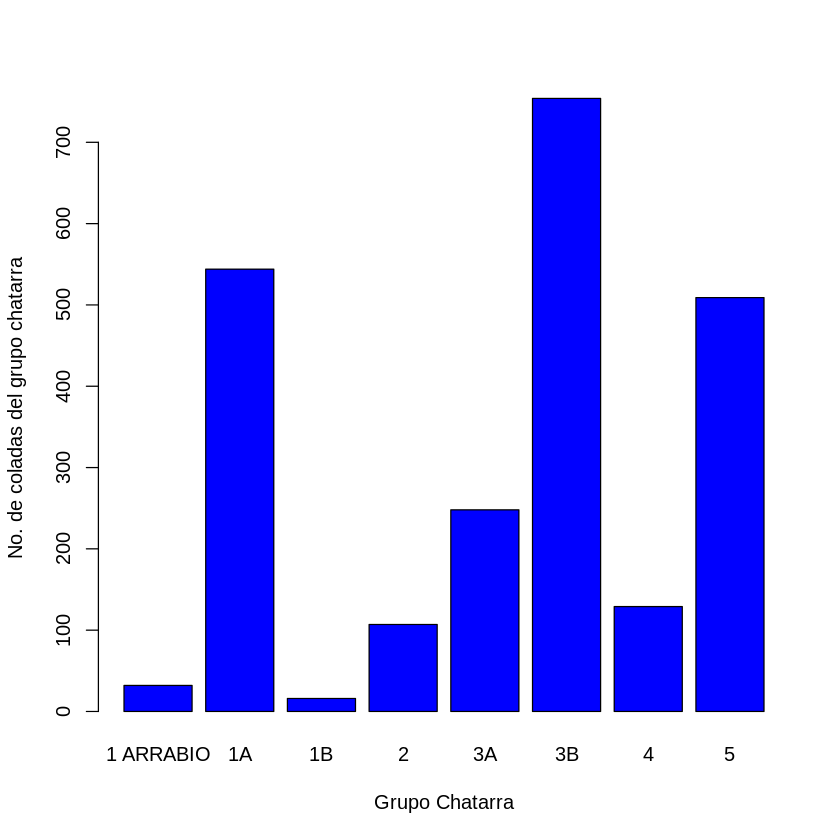

In [178]:
barplot(table(df$GPO_CH), xlab = "Grupo Chatarra", ylab = "No. de coladas del grupo chatarra", col = c("blue"))

In [179]:
df$GPO_CH <- as.factor(df$GPO_CH)
summary(df$GPO_CH)

1 ARRABIO        1A        1B         2        3A        3B         4         5 
       32       544        16       107       248       754       129       509

**Analizo si existe una posible la influencia del Grupo Chatarra hacia la temperatura a través de la siguiente visualización:**

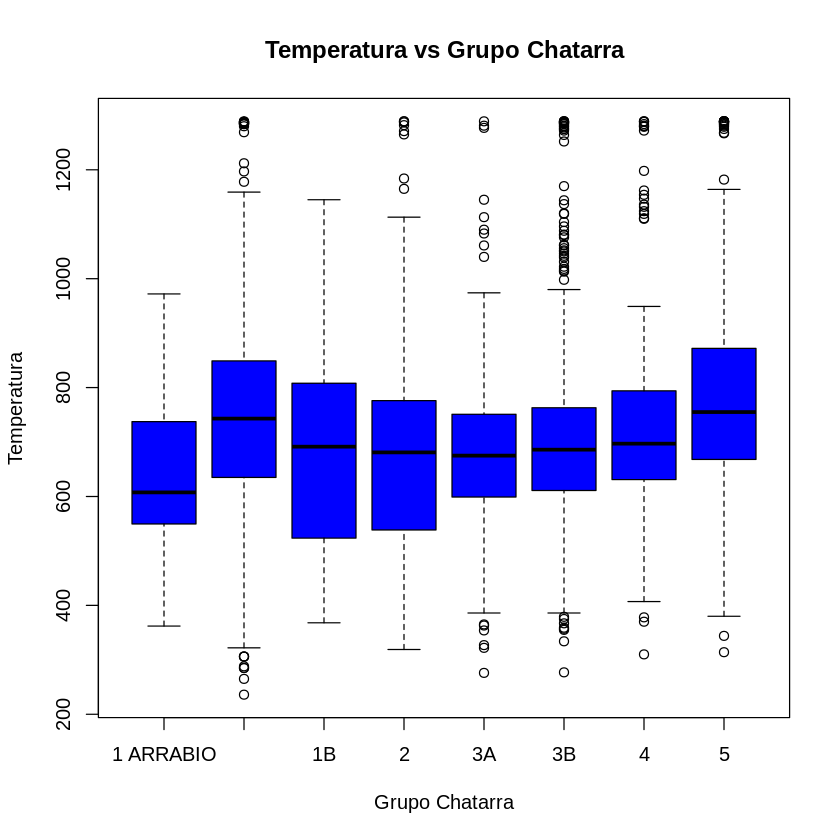

In [180]:
plot(x = df$GPO_CH, y = df$TEMPERATURA, xlab = "Grupo Chatarra", ylab = "Temperatura", main = "Temperatura vs Grupo Chatarra", col = "blue")

Veo nuevamente mi estructura de datos para tenerlo presente, para el siguiente paso:

In [182]:
str(df)

'data.frame':	2339 obs. of  50 variables:
 $ Mes                 : Factor w/ 12 levels "January","February",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Turno               : int  1 1 1 1 1 1 1 1 1 1 ...
 $ No_Colada           : int  48214 48215 48216 48217 48218 48219 48220 48221 48222 48223 ...
 $ GPO_CH              : Factor w/ 8 levels "1 ARRABIO","1A",..: 8 8 8 8 8 8 8 8 8 8 ...
 $ TCM                 : num  174 162 165 168 168 ...
 $ No_Cargas           : chr  "Hibrida" "1" "1" "1" ...
 $ C_Arrabio           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ C_Primeras          : num  8.53 9.05 8.63 10.64 0 ...
 $ C_Segundas          : num  54.7 49 47.1 46 56.4 ...
 $ C_Triturado         : num  35.1 34.3 36.1 35 34.9 ...
 $ C_Retornos          : num  1.64 7.71 8.22 8.32 8.63 ...
 $ Cumpl_CM            : num  62.3 75.4 75.9 74.7 96.1 ...
 $ Cons_Chorreadura    : num  7.323 0.831 7.863 7.694 7.545 ...
 $ Cons_Ri             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Rendimiento_Teo     : num  87.6 89.1 88.4 88.5 87.9 ...

**Voy a eliminar algunas columnas que no serán de utilidad para la correlación y voy a quitar las que tienen "sin Análisis" que tenemos menos del 50% de información, por lo que puede ser poco concluyente o confiable como para incluir, si queremos regresar el GPO_CH debemo asignar a un valor numérico (relacionarlo)**

In [201]:
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [199]:
df2 <- select(df, -GPO_CH, -No_Cargas, -RESULTADO, -coladas, -No_Colada, -MgO_ESCORIA, -FeO_ESCORIA, -CaO, -SiO2, -Al2O3, -IB3, -IB4)
head(df2)

,Mes,Turno,TCM,C_Arrabio,C_Primeras,C_Segundas,C_Triturado,C_Retornos,Cumpl_CM,Cons_Chorreadura,⋯,POTENCIA,FACTOR_O2,VELOCIDAD_DE_FUSIÓN,TIEMPO_VACIADO,REMANENTE_HF,ACERO_VACIADO,O2_VACIADA,TON_Hr_ACERO.LIQUIDO,TEMPERATURA_VACIADO,TEMPERATURA
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,March,1,174.11,0,8.529091,54.74126,35.09276,1.636896,62.29129,7.3229568,⋯,108.0851,3.236867,4976.942,4.5,99,147,829,50.93849,1603,853
2,March,1,162.45,0,9.048938,48.96891,34.27516,7.706987,75.44366,0.8310249,⋯,116.3617,3.438353,5201.174,2.8,78,149,906,221.83623,1650,671
3,March,1,164.56,0,8.629071,47.05882,36.09626,8.215848,75.90178,7.8633933,⋯,114.7328,1.653485,4648.588,4.1,140,146,590,129.20355,1626,780
4,March,1,168.31,0,10.635138,46.01628,35.03060,8.317985,74.71565,7.6941358,⋯,119.3446,3.560691,5482.410,3.8,104,145,855,199.70924,1636,849
5,March,1,168.32,0,0.000000,56.44011,34.93346,8.626426,96.06902,7.5451521,⋯,118.8056,2.933460,5301.418,3.8,91,147,1153,107.53912,1671,889
6,March,1,169.18,0,0.000000,55.10699,37.12023,7.772786,98.56717,7.2703629,⋯,121.2266,4.286679,5780.638,4.3,76,145,1130,218.59297,1675,833


**Ahora vamos a remplazar el "nombre del mes" por su relación numérica, para poderta tomar dentro de mi set de variables** 

In [202]:
df2$Mes <- as.integer(df$Mes, 0)
summary(df2$Mes)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   3.000   4.000   4.222   5.000   6.000 

**Ahora garantizo que todos los cambios se hayan realizado:**

In [203]:
head(df2)

,Mes,Turno,TCM,C_Arrabio,C_Primeras,C_Segundas,C_Triturado,C_Retornos,Cumpl_CM,Cons_Chorreadura,⋯,POTENCIA,FACTOR_O2,VELOCIDAD_DE_FUSIÓN,TIEMPO_VACIADO,REMANENTE_HF,ACERO_VACIADO,O2_VACIADA,TON_Hr_ACERO.LIQUIDO,TEMPERATURA_VACIADO,TEMPERATURA
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,3,1,174.11,0,8.529091,54.74126,35.09276,1.636896,62.29129,7.3229568,⋯,108.0851,3.236867,4976.942,4.5,99,147,829,50.93849,1603,853
2,3,1,162.45,0,9.048938,48.96891,34.27516,7.706987,75.44366,0.8310249,⋯,116.3617,3.438353,5201.174,2.8,78,149,906,221.83623,1650,671
3,3,1,164.56,0,8.629071,47.05882,36.09626,8.215848,75.90178,7.8633933,⋯,114.7328,1.653485,4648.588,4.1,140,146,590,129.20355,1626,780
4,3,1,168.31,0,10.635138,46.01628,35.03060,8.317985,74.71565,7.6941358,⋯,119.3446,3.560691,5482.410,3.8,104,145,855,199.70924,1636,849
5,3,1,168.32,0,0.000000,56.44011,34.93346,8.626426,96.06902,7.5451521,⋯,118.8056,2.933460,5301.418,3.8,91,147,1153,107.53912,1671,889
6,3,1,169.18,0,0.000000,55.10699,37.12023,7.772786,98.56717,7.2703629,⋯,121.2266,4.286679,5780.638,4.3,76,145,1130,218.59297,1675,833


In [204]:
str(df2)

'data.frame':	2339 obs. of  38 variables:
 $ Mes                 : int  3 3 3 3 3 3 3 3 3 3 ...
 $ Turno               : int  1 1 1 1 1 1 1 1 1 1 ...
 $ TCM                 : num  174 162 165 168 168 ...
 $ C_Arrabio           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ C_Primeras          : num  8.53 9.05 8.63 10.64 0 ...
 $ C_Segundas          : num  54.7 49 47.1 46 56.4 ...
 $ C_Triturado         : num  35.1 34.3 36.1 35 34.9 ...
 $ C_Retornos          : num  1.64 7.71 8.22 8.32 8.63 ...
 $ Cumpl_CM            : num  62.3 75.4 75.9 74.7 96.1 ...
 $ Cons_Chorreadura    : num  7.323 0.831 7.863 7.694 7.545 ...
 $ Cons_Ri             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Rendimiento_Teo     : num  87.6 89.1 88.4 88.5 87.9 ...
 $ Altura_Banda        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Tiempo_Caida_Banda  : num  21 23 34 26 26 25 26 28 29 27 ...
 $ TPQB                : num  149 152 149 123 230 ...
 $ Rendimiento_Real    : num  85.5 93.3 90.5 73 136.6 ...
 $ ENERGÍA             : num  365 367 406 361 37

**Ahora vamos a estandarizar los datos**

In [228]:
df3 <- scale(df2)
head(df3)

,Mes,Turno,TCM,C_Arrabio,C_Primeras,C_Segundas,C_Triturado,C_Retornos,Cumpl_CM,Cons_Chorreadura,⋯,POTENCIA,FACTOR_O2,VELOCIDAD_DE_FUSIÓN,TIEMPO_VACIADO,REMANENTE_HF,ACERO_VACIADO,O2_VACIADA,TON_Hr_ACERO.LIQUIDO,TEMPERATURA_VACIADO,TEMPERATURA
1,-1.258814,-0.9607939,0.78933321,-0.2909655,-1.218065,1.2651238,1.391982,-1.1959987,-0.76809858,0.1262953,⋯,-0.8956957,-0.18997766,-0.2083513,0.6706781,0.6325132,0.13208790,0.03821444,-2.6945976,-0.204390208,0.6711926
2,-1.258814,-0.9607939,-0.28433895,-0.2909655,-1.198027,0.9596867,1.310600,0.5340067,-0.01078192,-2.8040491,⋯,1.5080808,-0.05950996,0.1114833,-0.8466700,0.1565385,0.32779228,0.39849684,0.9476343,0.197348826,-0.3203825
3,-1.258814,-0.9607939,-0.09004665,-0.2909655,-1.214211,0.8586164,1.491870,0.6790347,0.01559672,0.3702389,⋯,1.0350108,-1.21526087,-0.6767007,0.3136550,1.5617970,0.03423571,-1.08006470,-1.0265856,-0.007794511,0.2734729
4,-1.258814,-0.9607939,0.25525947,-0.2909655,-1.136883,0.8034514,1.385795,0.7081440,-0.05270082,0.2938391,⋯,2.3744159,0.01970725,0.5126257,0.0458877,0.7458404,-0.06361648,0.15986824,0.4760563,0.077681879,0.6493998
5,-1.258814,-0.9607939,0.25618118,-0.2909655,-1.546840,1.3550170,1.376126,0.7960513,1.17683119,0.2265904,⋯,2.2178840,-0.38644200,0.2544660,0.0458877,0.4511895,0.13208790,1.55420792,-1.4883053,0.376849245,0.8673284
6,-1.258814,-0.9607939,0.33537003,-0.2909655,-1.546840,1.2844760,1.593794,0.5527599,1.32067540,0.1025554,⋯,2.9209977,0.48980436,0.9380037,0.4921665,0.1112076,-0.06361648,1.44659110,0.8785128,0.411039801,0.5622283


**Hagamos un análisis de correlación**

In [206]:
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.89 loaded



,Mes,Turno,TCM,C_Arrabio,C_Primeras,C_Segundas,C_Triturado,C_Retornos,Cumpl_CM,Cons_Chorreadura,⋯,POTENCIA,FACTOR_O2,VELOCIDAD_DE_FUSIÓN,TIEMPO_VACIADO,REMANENTE_HF,ACERO_VACIADO,O2_VACIADA,TON_Hr_ACERO.LIQUIDO,TEMPERATURA_VACIADO,TEMPERATURA
Mes,1.00,0.00,0.03,NA,NA,NA,NA,NA,0.12,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.36
Turno,0.00,1.00,-0.07,NA,NA,NA,NA,NA,-0.02,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,-0.03
TCM,0.03,-0.07,1.00,NA,NA,NA,NA,NA,0.13,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.02
C_Arrabio,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
C_Primeras,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
C_Segundas,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
C_Triturado,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
C_Retornos,NA,NA,NA,NA,NA,NA,NA,1,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Cumpl_CM,0.12,-0.02,0.13,NA,NA,NA,NA,NA,1.00,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.03
Cons_Chorreadura,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


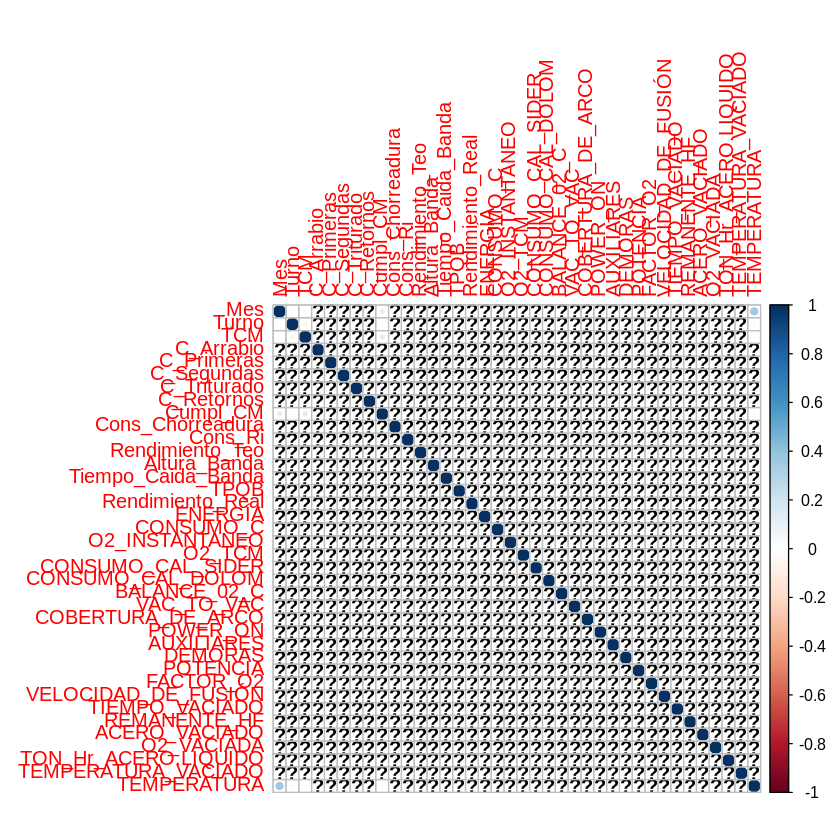

In [218]:
corr <- cor(df3, method = "pearson")
round(corr, digits = 2)
corrplot(corr) 

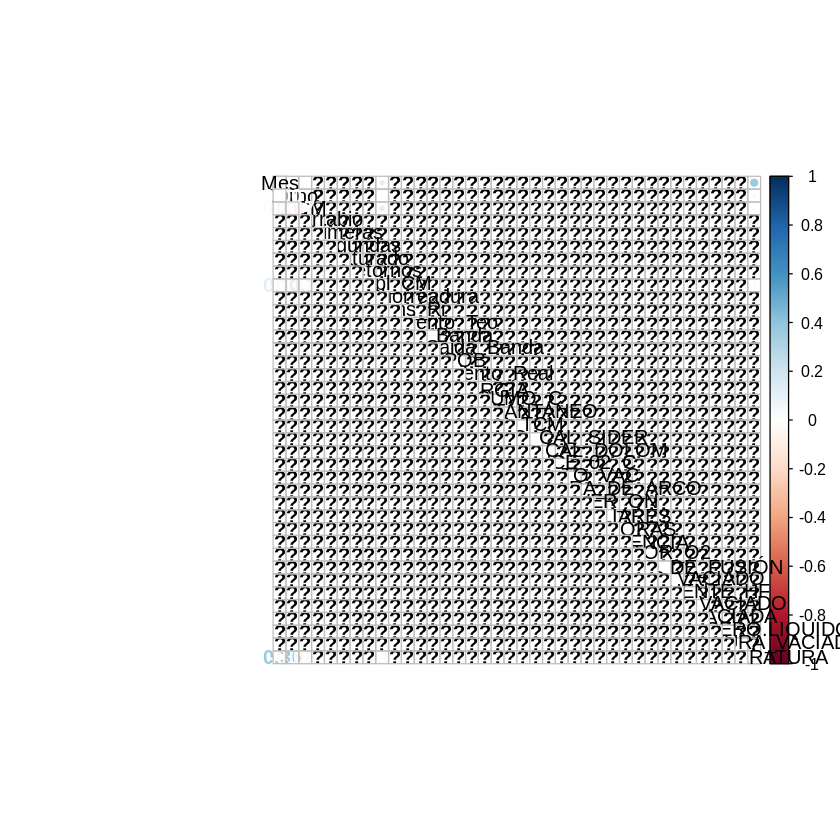

In [219]:
corrplot.mixed(corr,
               lower = "number", 
               upper = "circle",
               tl.col = "black")

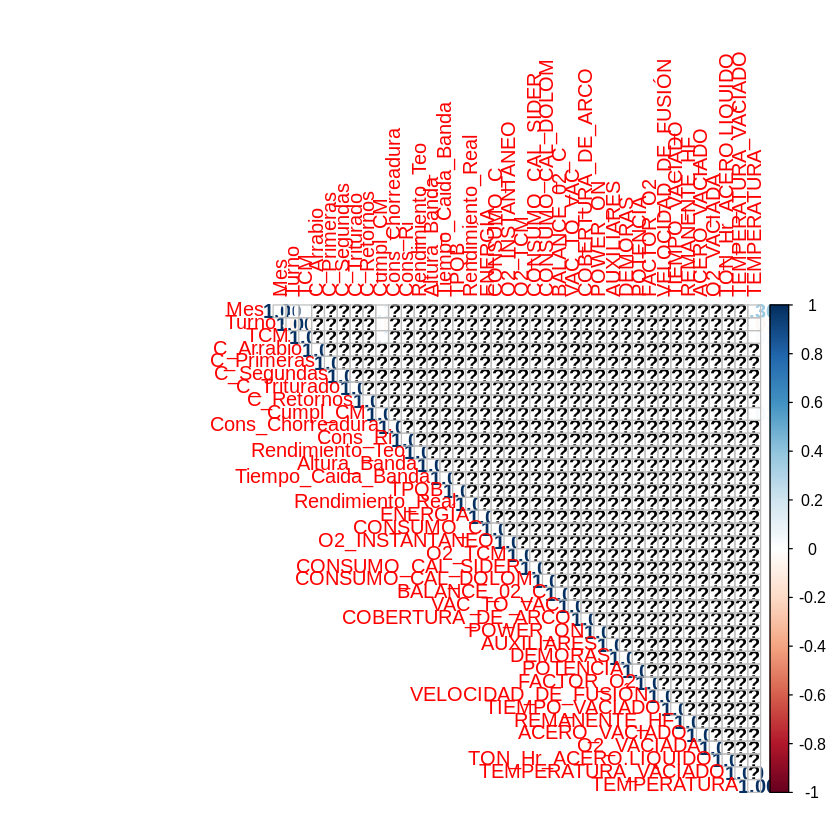

In [220]:
corrplot(corr, method="number", type="upper")

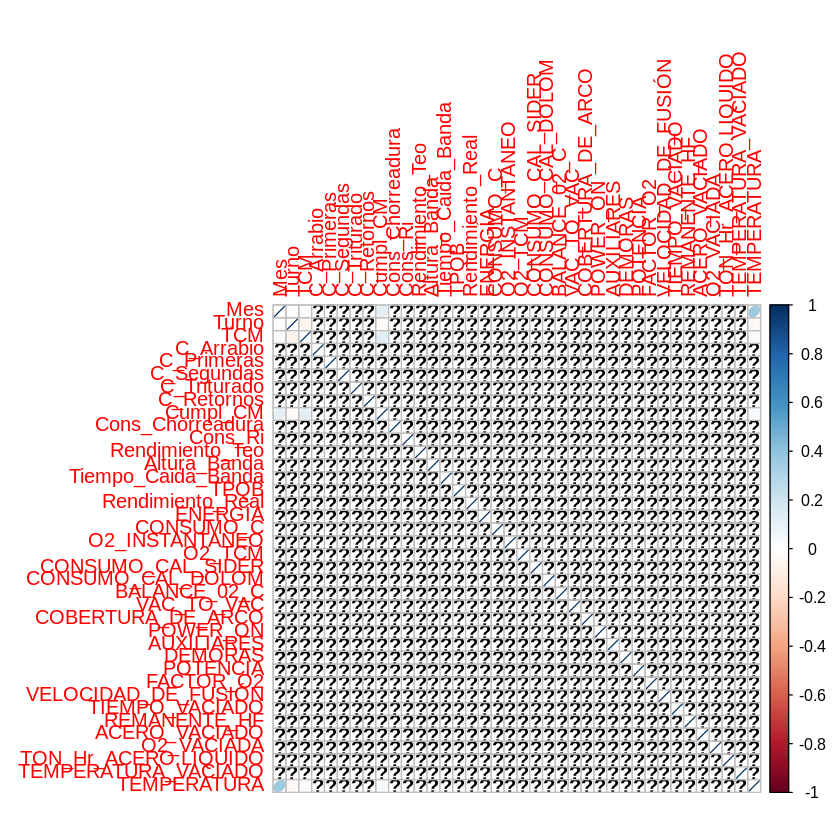

In [221]:
corrplot(corr, method = "ellipse")

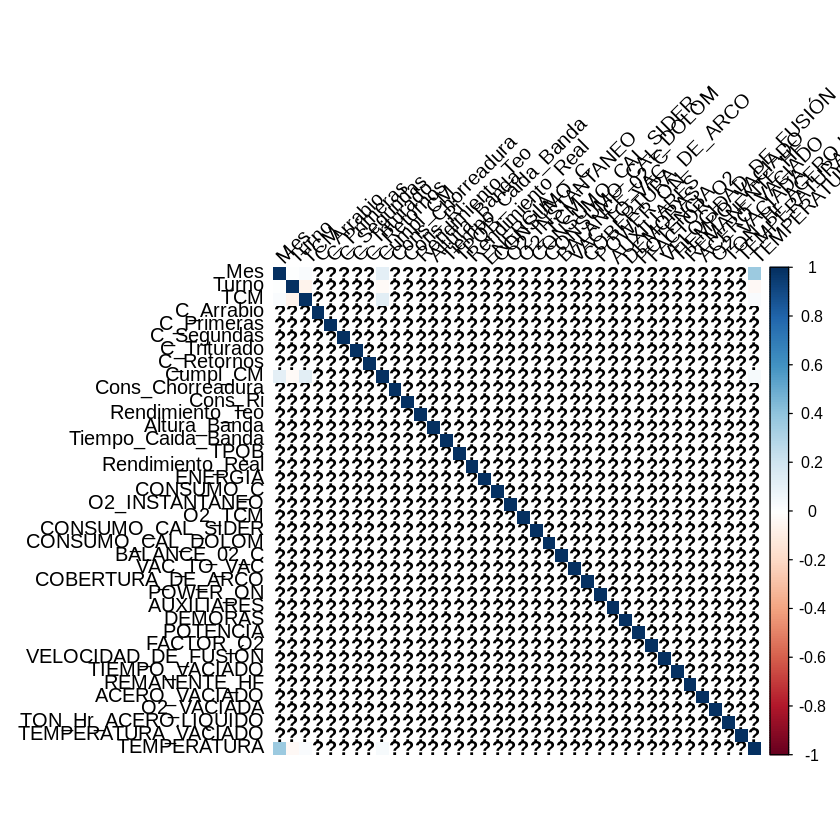

In [222]:
corrplot(corr, method = "shade", shade.col = NA, tl.col = "black", tl.srt = 45)